In [1]:
# ----------- Importing libraries -----------------


import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [2]:
# --------------- Reading the dataset -------------------

data = pd.read_csv('titanic_train.csv')

In [3]:
# ----------- Printing first five rows ---------------

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# ---------- getting all the columns ----------
data.columns 

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
# ------- summary of our dataset --------------

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# ------------ getting dataset shape -----------------
data.shape

(891, 12)

In [7]:
# ------ check for null values ---------------

data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# we have so much null values in Cabin column , and that also not a good feature for prediction also so lets remove it 

data.drop(['Cabin'] , axis = 1 , inplace = True)

In [9]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [10]:
# removing the features which are not required for our model 

data.drop(['PassengerId', 'Name', 'Ticket'] , axis = 1 , inplace  = True)

In [11]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [12]:
# ------- filling null values in age column with mean value of age column data 

data.Age.fillna(np.mean(data.Age), inplace = True)

In [13]:
# ------ check for null values ---------------
data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [14]:
# there are two more null values in Embarked column lets fill them with the mode value 

md_value = data.Embarked.mode()
data['Embarked'].fillna('S',inplace = True)

print(data.isna().sum())

print("Shape : \n",data.shape)

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
Shape : 
 (891, 8)


* As we see all null values are filled 


In [15]:
data.sample(5)   # getting random 5 rows 

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
476,0,2,male,34.000000,1,0,21.000,S
168,0,1,male,29.699118,0,0,25.925,S
673,1,2,male,31.000000,0,0,13.000,S
542,0,3,female,11.000000,4,2,31.275,S
850,0,3,male,4.000000,4,2,31.275,S


# Data visualization 


In [16]:
# --------- getting mathematical features summary ------------
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


C:\Users\DELL\AppData\Local\Temp\ipykernel_5400\1163964090.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr() , annot = True )


<AxesSubplot: >

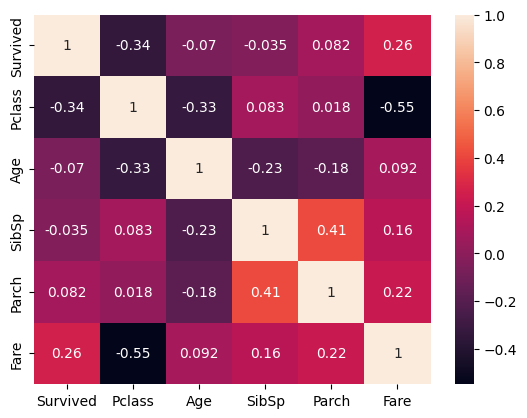

In [17]:
# correlation matrix 

sns.heatmap(data.corr() , annot = True )

----------- Insights : Age , Pclass and Survival are interdependent on each other !!

Text(0.5, 0, '0 : Not Survived , 1 : Survived')

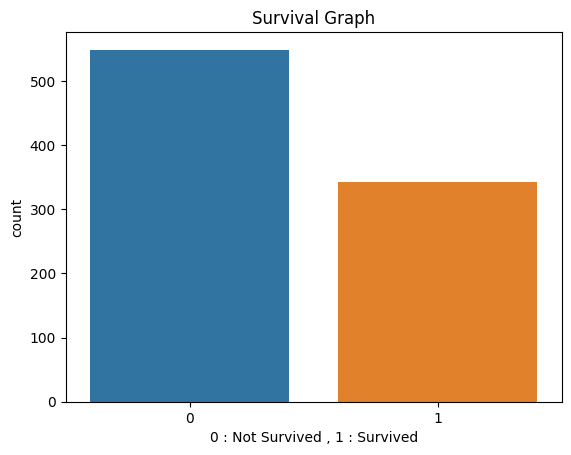

In [18]:
# -------- Total surival rate -----------

sns.countplot(x = 'Survived' , data = data , )
plt.title("Survival Graph")
plt.xlabel("0 : Not Survived , 1 : Survived")

<AxesSubplot: xlabel='Sex', ylabel='count'>

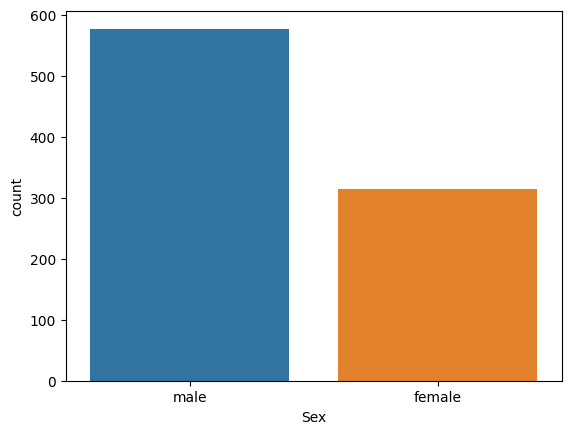

In [19]:
# getting  how many males and females are on the boat 

sns.countplot(x = 'Sex' , data = data)


In [20]:
# getting how many young , old and childs on the ship 

def AgeCal(value):
    if value < 18 :
        return 'child'
    elif value >18 and value < 40 :
        return 'Young'
    else :
        return 'Old'
    

# converting datatype of age column in int from float 

data['Age'] = data['Age'].astype(int)

data['agee'] = data.Age.apply(AgeCal)


Young    589
Old      189
child    113
Name: agee, dtype: int64


<AxesSubplot: xlabel='agee', ylabel='count'>

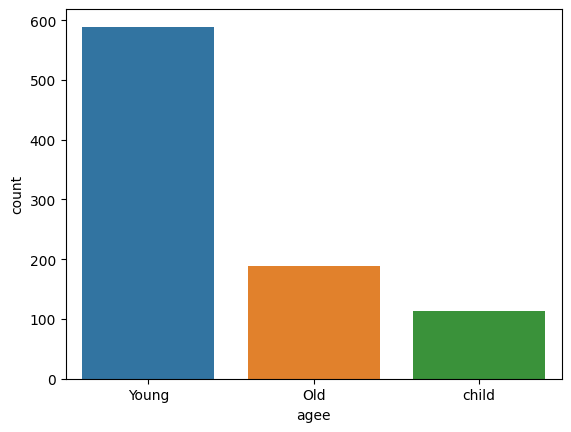

In [21]:
print(data.agee.value_counts())
sns.countplot(x = 'agee' , data = data)

In [22]:
# average price for a ticket on titanic  

np.mean(data.Fare)

32.204207968574636

3    491
1    216
2    184
Name: Pclass, dtype: int64


<AxesSubplot: xlabel='Pclass', ylabel='count'>

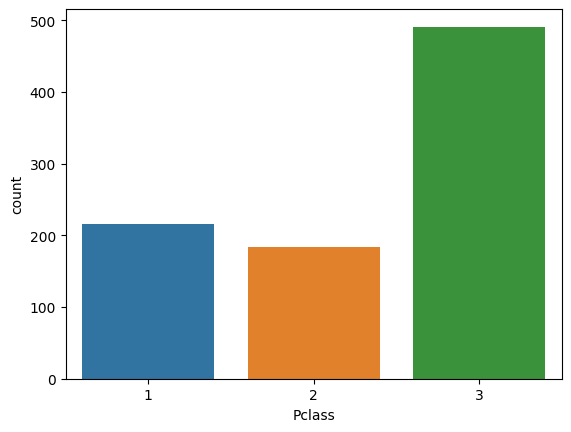

In [23]:
# getting how many 1st class , 2nd class and 3rd class people on the ship 

print(data.Pclass.value_counts())

sns.countplot(x = 'Pclass' , data = data )

As we see there are lower class(3rd class) people in large amount than other classes 


In [24]:
data[(data.Pclass == 3) & (data.Survived == 1) ]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,agee
2,1,3,female,26,0,0,7.9250,S,Young
8,1,3,female,27,0,2,11.1333,S,Young
10,1,3,female,4,1,1,16.7000,S,child
19,1,3,female,29,0,0,7.2250,C,Young
22,1,3,female,15,0,0,8.0292,Q,child
...,...,...,...,...,...,...,...,...,...
838,1,3,male,32,0,0,56.4958,S,Young
855,1,3,female,18,0,1,9.3500,S,Old
858,1,3,female,24,0,3,19.2583,C,Young
869,1,3,male,4,1,1,11.1333,S,child


-- As we see only 119 out of 491 3rd class people got survived from titanic disaster acc. to the given data 

<AxesSubplot: xlabel='Survived', ylabel='count'>

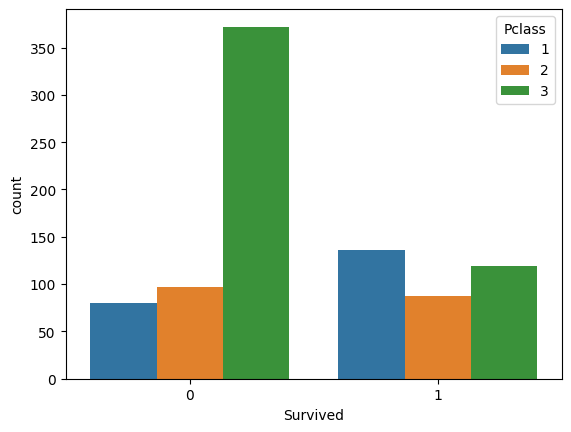

In [25]:
# According to Class which type of people more survived !

sns.countplot(x = 'Survived' , hue = 'Pclass' , data = data )

-- Acc. to the graph , the left side is non-survived peoples and right side is of survived !!

        - We can see that more number of 3rd class people get died in that disaster and more preferences were given to save who are from 1st class 

<AxesSubplot: xlabel='Sex', ylabel='count'>

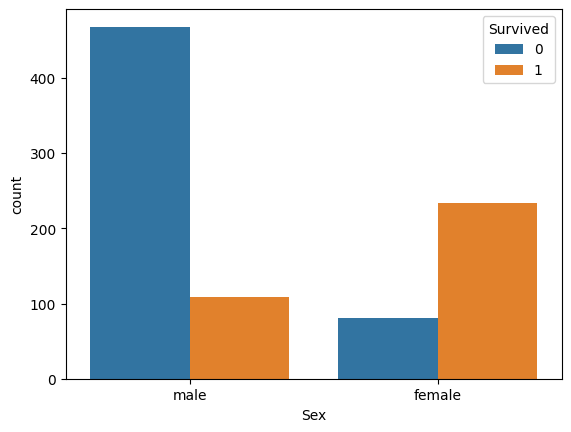

In [26]:
# According to Sex which group of people more survived ! 

sns.countplot(x = 'Sex' , hue = 'Survived' , data = data)

<!-- As we see  -->

-- As we see that more females were survived from the impact of disaster , the rate of mens for survival is much lesser than 
        females , bcoz more preferences for saving were given to females and child 

<AxesSubplot: xlabel='agee', ylabel='count'>

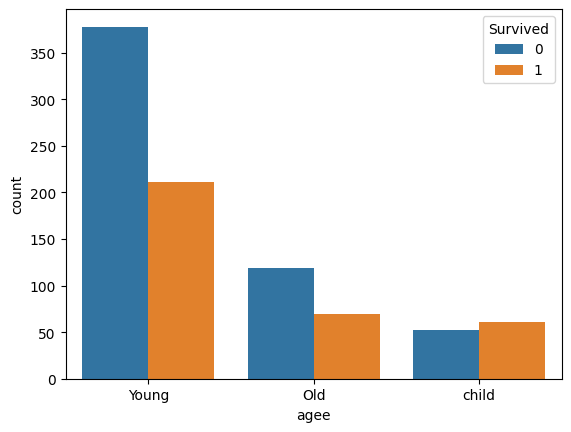

In [27]:
# Survival graph on the basis of age grp ----------

sns.countplot(x = 'agee' , data= data , hue = 'Survived')

-------- As we see the survival rate of child is more than other age grps 

# Modelling --------

In our dataset we have some categorical columns such as Sex , Embarked so we need to convert them into numerical format !

In [28]:
# as we dont need agee feature for model training so lets remove that 
data.drop(['agee'] , axis = 1 , inplace = True )

In [29]:
# converting into numerical 

data.replace({'Sex': {'male' : 0 , 'female' : 1},'Embarked': {'S': 0 , 'C': 1 ,'Q' : 2}} , inplace =True  )


In [30]:
data.head()    # now everything is numerical 

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22,1,0,7.2500,0
1,1,1,1,38,1,0,71.2833,1
2,1,3,1,26,0,0,7.9250,0
3,1,1,1,35,1,0,53.1000,0
4,0,3,0,35,0,0,8.0500,0


In [31]:
# -------- Dividing dataset in X and Y for splitting in train and test set ------

X =  data.drop('Survived', axis = 1 )

y = data['Survived']


In [32]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22,1,0,7.2500,0
1,1,1,38,1,0,71.2833,1
2,3,1,26,0,0,7.9250,0
3,1,1,35,1,0,53.1000,0
4,3,0,35,0,0,8.0500,0
...,...,...,...,...,...,...,...
886,2,0,27,0,0,13.0000,0
887,1,1,19,0,0,30.0000,0
888,3,1,29,1,2,23.4500,0
889,1,0,26,0,0,30.0000,1


In [33]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [34]:
#  dividing into train and test dataset -------

X_train , X_test , y_train, y_test = train_test_split(X, y , test_size = 0.3 , random_state = 42)
X_train.shape , y_train.shape , X_test.shape , y_test.shape

((623, 7), (623,), (268, 7), (268,))

In [35]:
# ------- model training ----------

model = LogisticRegression()

model.fit(X_train, y_train)




E:\python main\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# X predictions and training accuracy 

In [36]:
X_pred = model.predict(X_train)

In [37]:
X_pred

array([1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,

In [38]:
train_accuracy = accuracy_score(X_pred , y_train)
train_accuracy

0.8025682182985554

# Y Prediction and Test Accuracy 

In [39]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0], dtype=int64)

In [40]:
test_accuracy = accuracy_score(y_pred , y_test)
test_accuracy

0.8059701492537313

# Model Evaluation 

In [41]:
#  lets generate a classification report of our model 
print("Classification report :---------\n", classification_report(y_test , y_pred))

Classification report :---------
               precision    recall  f1-score   support

           0       0.81      0.87      0.84       157
           1       0.79      0.72      0.75       111

    accuracy                           0.81       268
   macro avg       0.80      0.79      0.80       268
weighted avg       0.81      0.81      0.80       268



Text(50.722222222222214, 0.5, 'Predicted')

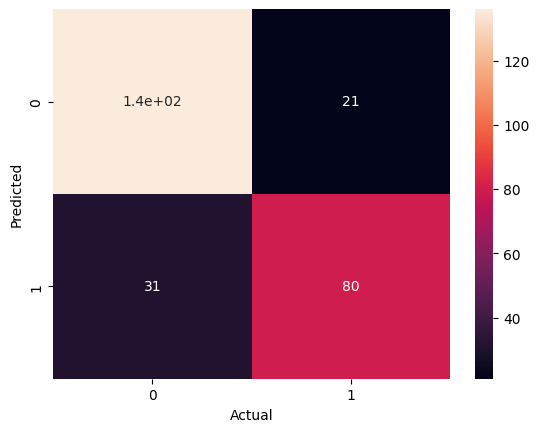

In [42]:
# generating its confusion matrix ---------
sns.heatmap(confusion_matrix(y_test , y_pred ), annot = True)
plt.xlabel('Actual')
plt.ylabel('Predicted')